1. Carga los datos y genera un dataFrame que excluya las columnas correspondientes
a la abreviatura del país, código de llamada, capital, código de moneda, ciudad más
grande, lenguaje oficial, latitud y longitud. Considerando estos datos, realiza una
inspección inicial sobre ellos, considerando gráficos. Concluye.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Agricultural Land( %)                      188 non-null    object 
 3   Land Area(Km2)                             194 non-null    object 
 4   Armed Forces size                          171 non-null    object 
 5   Birth Rate                                 189 non-null    float64
 6   Co2-Emissions                              188 non-null    object 
 7   CPI                                        178 non-null    object 
 8   CPI Change (%)                             179 non-null    object 
 9   Fertility Rate                             188 non-null    float64
 10  Forested Area (%)         

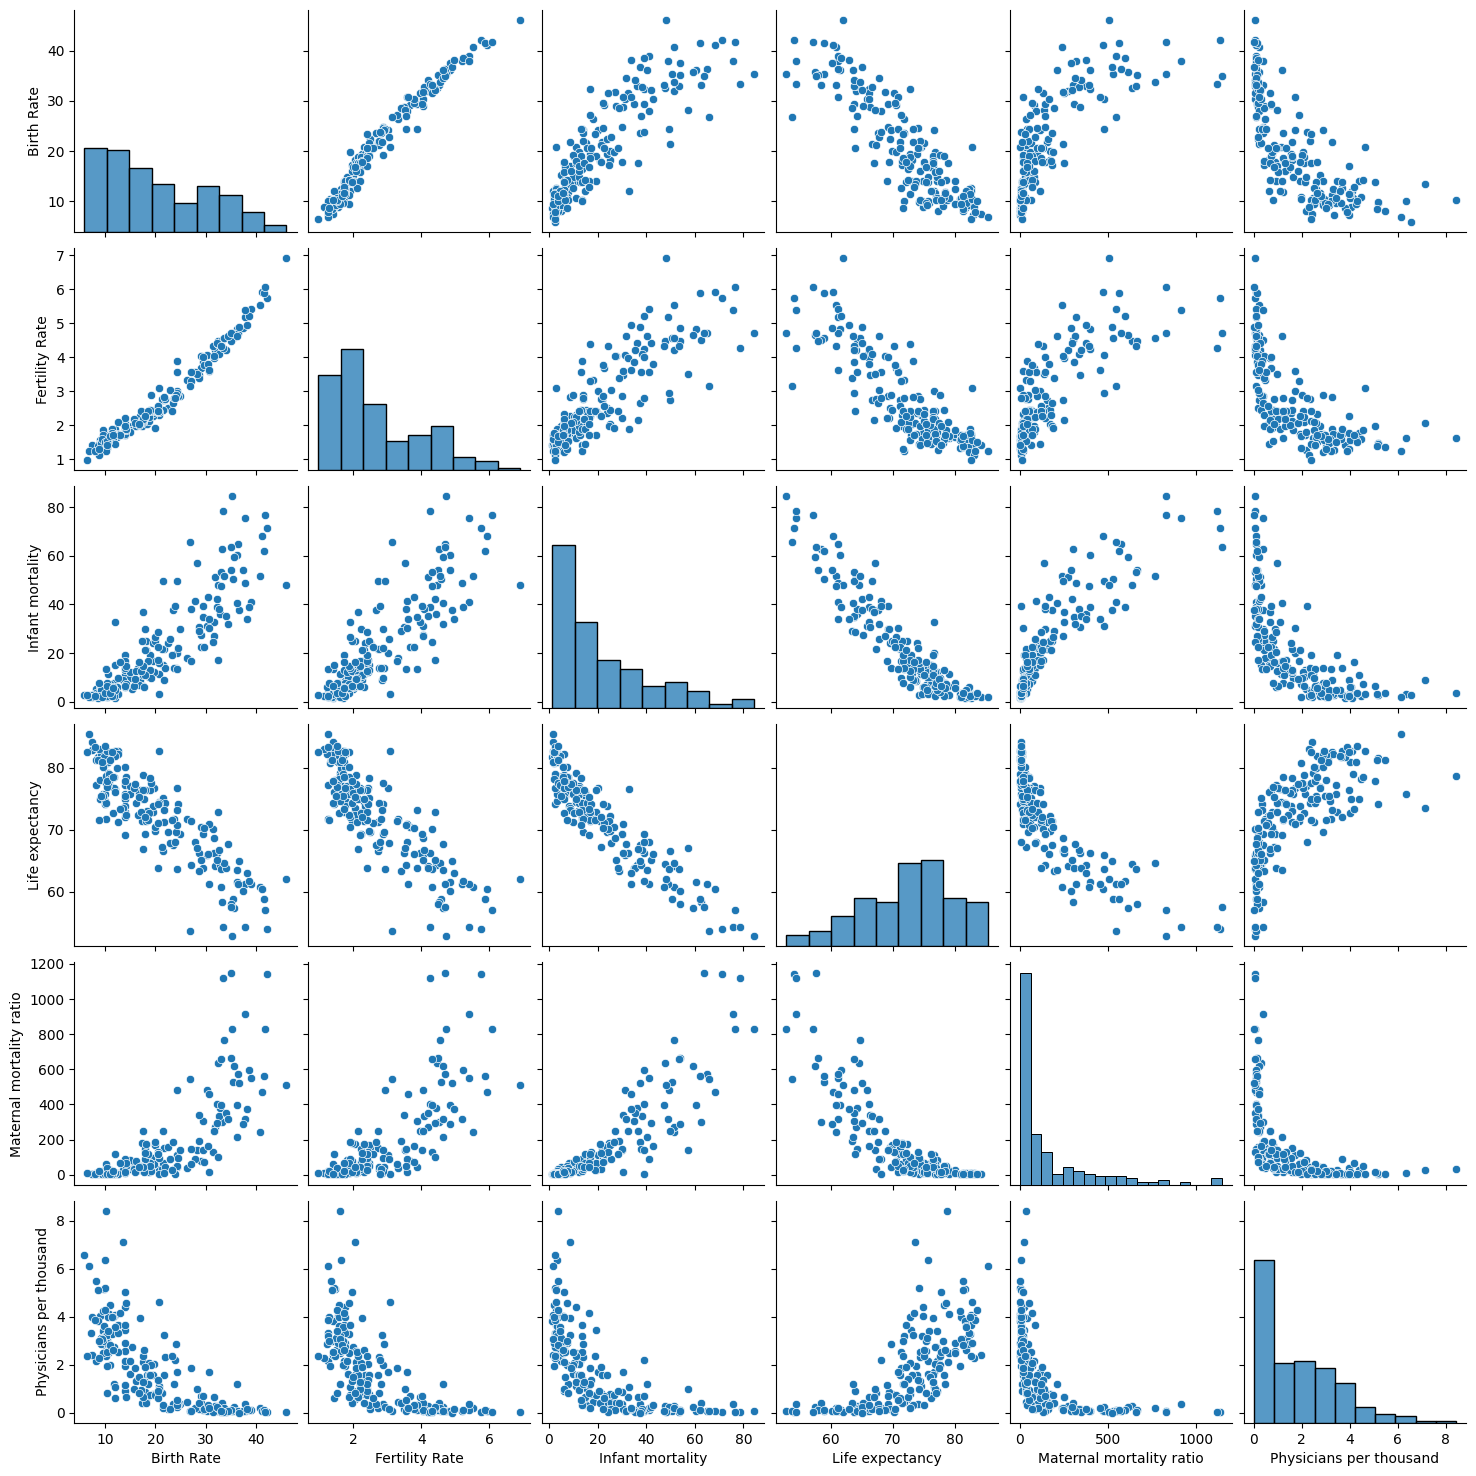

'Los datos de naciemientos y fertilidad se distribuyen uniformemente entre ellos al cruzarlos en las tablas, las demás distribuciones tienen una desviación algunos se distribuyen mas pegados al 0 y otros se pegan al 0 en el eje x y despegan hacia el positivo de la eje y.\nPara mi esto significa que en los dato no hay normalidad al cruzar las columnas por ende es un poco más aleatorio lo que pueda pasar, se puede generar probabilidades de crecimiento mundial, crecimiento por país\npero al final va haber un porcentaje erroneo ya que la distribucion no tiene si normalidad'

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#FernandoSanchez Cargar datos
data = pd.read_csv('world-data-2023.csv')
"""print(data.info())""" #Se hace un data.info ya que los nombres de las columnas Currency_Code,Largest City,Official Language mencionados en el desafio son incorrectos 
#FernandoSanchez Excluir columnas especificadas
columns_to_exclude = ['Abbreviation', 'Calling Code', 'Capital/Major City','Currency-Code', 'Largest city',
                      'Official language', 'Latitude', 'Longitude']
filtered_data = data.drop(columns=columns_to_exclude)

#FernandoSanchez Inspección inicial
print(filtered_data.info())
print(filtered_data.describe())

#FernandoSanchez Visualización de variables
sb.pairplot(filtered_data)
plt.show()

"""Los datos de naciemientos y fertilidad se distribuyen uniformemente entre ellos al cruzarlos en las tablas, las demás distribuciones tienen una desviación algunos se distribuyen mas pegados al 0 y otros se pegan al 0 en el eje x y despegan hacia el positivo de la eje y.
Para mi esto significa que en los dato no hay normalidad al cruzar las columnas por ende es un poco más aleatorio lo que pueda pasar, se puede generar probabilidades de crecimiento mundial, crecimiento por país
pero al final va haber un porcentaje erroneo ya que la distribucion no tiene si normalidad"""


2. De las variables codificadas numéricamente, ¿hay pares de ellas en la que parezca
haber correlación? ¿Para cuál(es) de ellas se observa más claramente?

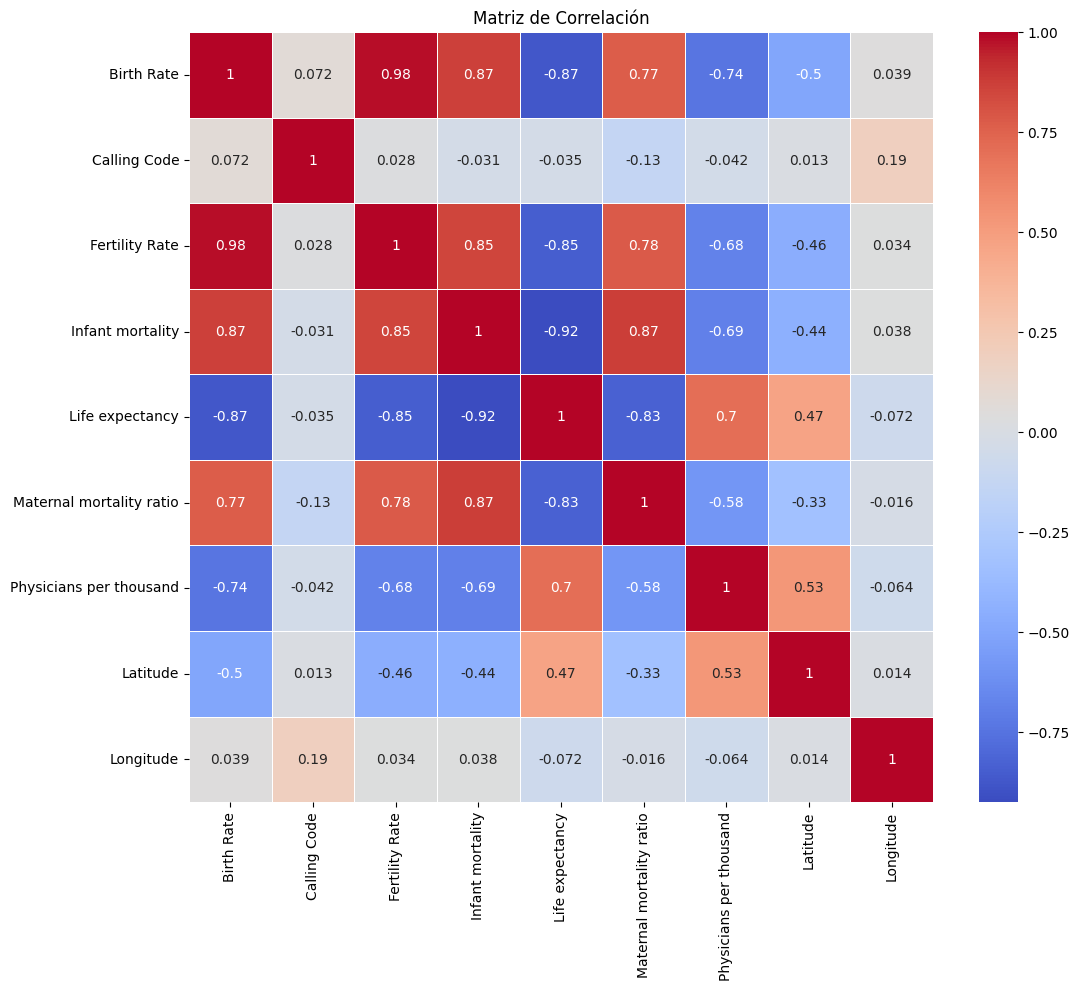

In [6]:
#FernandoSanchez Seleccionar solo columnas numéricas
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
"""Se hace esta especificacion ya que hay valores string y al correlacionar mandaba error"""
#FernandoSanchez Calcular correlación
correlation_matrix = numeric_columns.corr()

#FernandoSanchez Visualizar correlación usando un mapa de calor
plt.figure(figsize=(12, 10))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

"""Podemos observar que datos tienen más correlación con otros y así podemos enfocar las probabilidades y enfatizar en lo que si tiene relacion con un valor y con otro no"""


3. Considera los dos pares de variables anteriores y elimina en cada caso los faltantes
y atípicos. Justifica en cada caso tu procedimiento.


In [18]:
"""Para un par de variables"""

#FernandoSanchez Seleccionar solo las columnas relevantes
pair_data = filtered_data[['Birth Rate', 'Fertility Rate']].dropna()

#FernandoSanchez Tratamiento de atípicos
limite_inf1= pair_data['Birth Rate'].quantile(0.05)
limite_sup1= pair_data['Birth Rate'].quantile(0.95)
limite_inf2= pair_data['Fertility Rate'].quantile(0.05)
limite_sup2= pair_data['Fertility Rate'].quantile(0.95)
pair_data = pair_data[
    (pair_data['Birth Rate'] > limite_inf1) & (pair_data['Birth Rate'] < limite_sup1) &
    (pair_data['Fertility Rate'] > limite_inf2) & (pair_data['Fertility Rate'] < limite_sup2)
]
"""Se generan los limites con los cuantiles y al emparejar los datos eliminamos aquellos atipicos y faltantes al poner los limites generados"""

"""Para otro par de variables"""

#FernandoSanchez Seleccionar solo las columnas relevantes
pair_data2 = filtered_data[['Infant mortality', 'Maternal mortality ratio']].dropna()

#FernandoSanchez Tratamiento de atípicos
limite_inf1= pair_data2['Infant mortality'].quantile(0.05)
limite_sup1= pair_data2['Infant mortality'].quantile(0.95)
limite_inf2= pair_data2['Maternal mortality ratio'].quantile(0.05)
limite_sup2= pair_data2['Maternal mortality ratio'].quantile(0.95)
pair_data2 = pair_data2[
    (pair_data2['Infant mortality'] > limite_inf1) & (pair_data2['Infant mortality'] < limite_sup1) &
    (pair_data2['Maternal mortality ratio'] > limite_inf2) & (pair_data2['Maternal mortality ratio'] < limite_sup2)
]
"""Se generan los limites con los cuantiles y al emparejar los datos eliminamos aquellos atipicos y faltantes al poner los limites generados"""

'Se generan los limites con los cuantiles y al emparejar los datos eliminamos aquellos atipicos y faltantes al poner los limites generados'

4. Construye un gráfico para verificar la correlación entre estas variables, ahora con los
datos preparados. Compara con lo obtenido anteriormente.

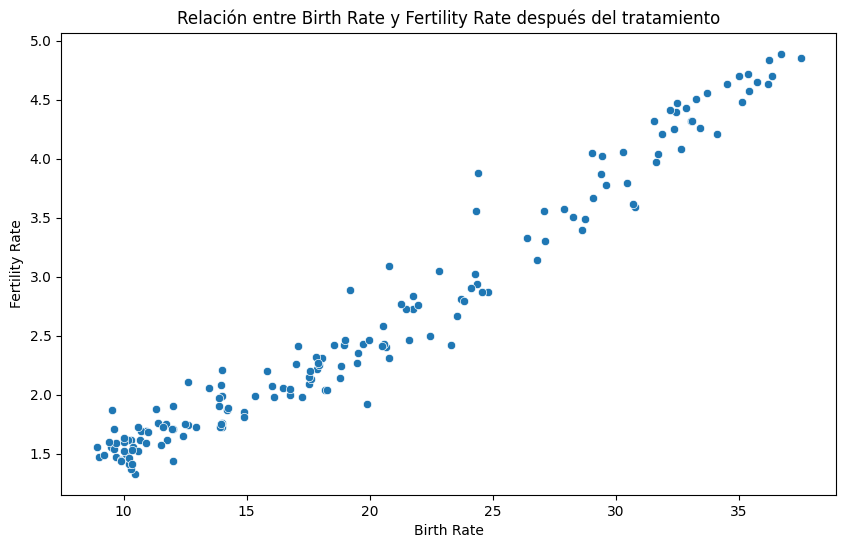

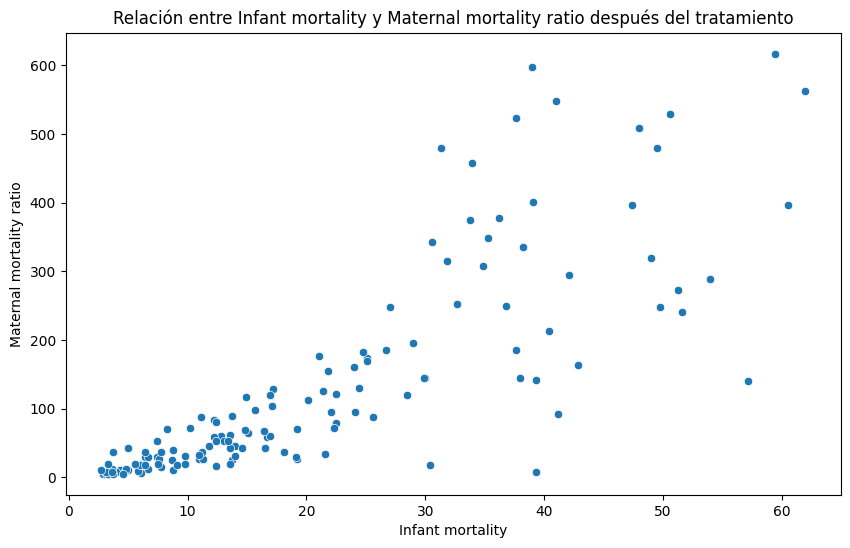

'Podemos observar que el primer par de variables tiene mas normalidad de distribucion entre ellas que la segunda como se nota en el mapa de calor pero notamos que un 0.1 más de correlacion\nmarca la diferencia en la distribución, notamos que en el segundo par inicia con normalidad pero se exparse en la mayoria de los puntos y se desvia de la normalidad'

In [16]:
#FernandoSanchez Visualizar la correlación después del tratamiento
plt.figure(figsize=(10, 6))
sb.scatterplot(x='Birth Rate', y='Fertility Rate', data=pair_data)
plt.title(f'Relación entre Birth Rate y Fertility Rate después del tratamiento')
plt.xlabel('Birth Rate')
plt.ylabel('Fertility Rate')
plt.show()
#FernandoSanchez Visualizar los datos después del tratamiento
plt.figure(figsize=(10, 6))
sb.scatterplot(x='Infant mortality', y='Maternal mortality ratio', data=pair_data2)
plt.title(f'Relación entre Infant mortality y Maternal mortality ratio después del tratamiento')
plt.xlabel('Infant mortality')
plt.ylabel('Maternal mortality ratio')
plt.show()

"""Podemos observar que el primer par de variables tiene mas normalidad de distribucion entre ellas que la segunda como se nota en el mapa de calor pero notamos que un 0.1 más de correlacion
marca la diferencia en la distribución, notamos que en el segundo par inicia con normalidad pero se exparse en la mayoria de los puntos y se desvia de la normalidad"""

5. Realiza lo mismo para comparar la cantidad de médicos por cada mil personas y la
esperanza de vida. ¿Qué puedes concluir?

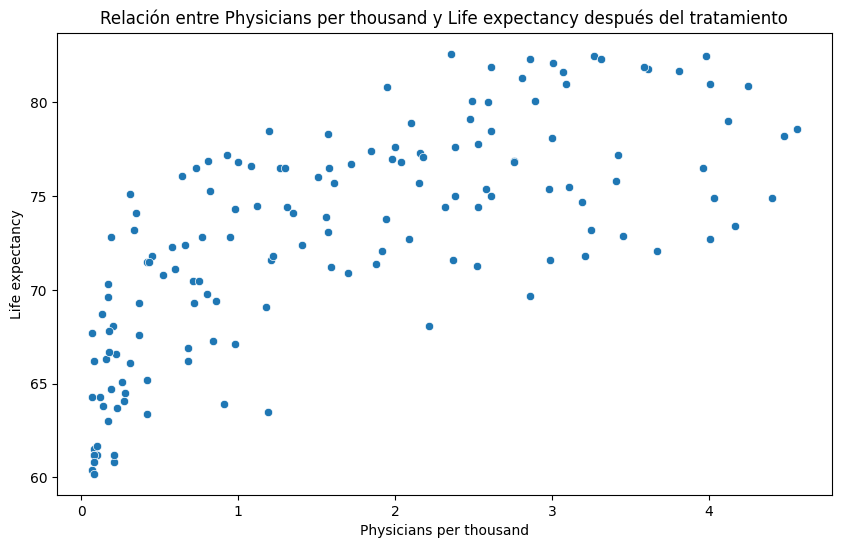

In [21]:
#FernandoSanchez Seleccionar solo las columnas relevantes
pair_data_medical = filtered_data[['Physicians per thousand', 'Life expectancy']].dropna()

#FernandoSanchez Tratamiento de atípicos
limite_inf3 = pair_data_medical['Physicians per thousand'].quantile(0.05)
limite_sup3 = pair_data_medical['Physicians per thousand'].quantile(0.95)

limite_inf4 = pair_data_medical['Life expectancy'].quantile(0.05)
limite_sup4 = pair_data_medical['Life expectancy'].quantile(0.95)

#FernandoSanchez Aplicar el tratamiento de atípicos a ambas variables simultáneamente
pair_data_medical = pair_data_medical[
    (pair_data_medical['Physicians per thousand'] > limite_inf3) & (pair_data_medical['Physicians per thousand'] < limite_sup3) &
    (pair_data_medical['Life expectancy'] > limite_inf4) & (pair_data_medical['Life expectancy'] < limite_sup4)
]

#FernandoSanchez Visualizar la correlación después del tratamiento
plt.figure(figsize=(10, 6))
sb.scatterplot(x='Physicians per thousand', y='Life expectancy', data=pair_data_medical)
plt.title(f'Relación entre Physicians per thousand y Life expectancy después del tratamiento')
plt.xlabel('Physicians per thousand')
plt.ylabel('Life expectancy')
plt.show()

"""Al observar la grafica podemos concluir que si afecta la esperanza de vida el numero de medicos por cada mil ya que donde mas se botan los valores hacia el positivo del eje y es en cuanto empiezan a aumentar los medicos"""

6. Construye un gráfico para representar la población total de los países y su producto
interno bruto. Prepara los datos y escoge el gráfico adecuado (si es necesario, limpia
y/o transforma los datos). Justifica.

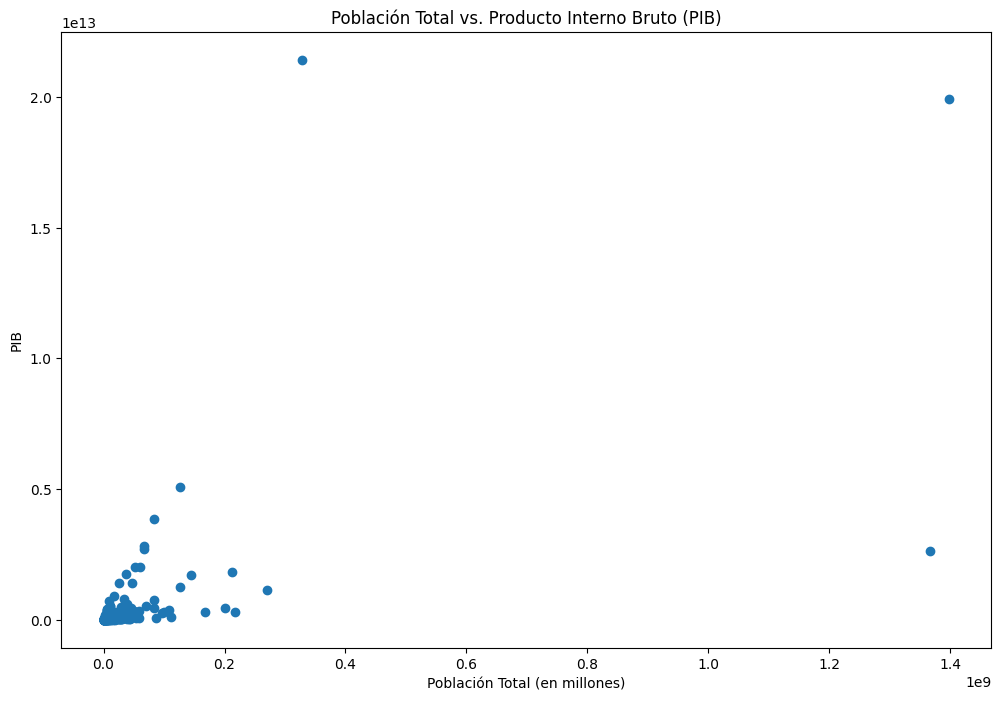

'Se genera en automatico los logaritmos, se quitaron comas y el signo de pesos para que fueran datos numericos y que se generara el logaritmo.\nObservamos en el grafico sin los filtros una normalidad, todos los datos se distribuyen correctamente pero al limpiar datos y hacerlos numericos vemos que no tenemos \ncorrelacion entre el PIB y la población total ya que la mayoría de los datos estan entre el 0.5 e13 de PIB y el 0, por la parte del eje x eestán entre el 0.3 e9 y el 0, los otros datos \nlos tomamos como atípicos'

In [46]:
#FernandoSanchez Eliminar faltantes y limpiar datos
population_gdp_data = filtered_data[['Population', 'GDP']].dropna()
population_gdp_data['Population'] = pd.to_numeric(population_gdp_data['Population'].str.replace(',', ''), errors='coerce')
population_gdp_data['GDP'] = pd.to_numeric(population_gdp_data['GDP'].str.replace(',', '').str.replace('$', ''), errors='coerce')

#FernandoSanchez Gráfico de dispersión sin escala logarítmica
plt.figure(figsize=(12, 8))
plt.scatter(x='Population', y='GDP', data=population_gdp_data)
plt.title('Población Total vs. Producto Interno Bruto (PIB)')
plt.xlabel('Población Total (en millones)')
plt.ylabel('PIB')
plt.show()


"""Se genera en automatico los logaritmos, se quitaron comas y el signo de pesos para que fueran datos numericos y que se generara el logaritmo.
Observamos en el grafico sin los filtros una normalidad, todos los datos se distribuyen correctamente pero al limpiar datos y hacerlos numericos vemos que no tenemos 
correlacion entre el PIB y la población total ya que la mayoría de los datos estan entre el 0.5 e13 de PIB y el 0, por la parte del eje x eestán entre el 0.3 e9 y el 0, los otros datos 
los tomamos como atípicos"""


7. Escoge otro par de datos, límpialos, prepáralos y analiza su posible relación. Justifica
utilizando las herramientas vistas y gráficos adecuados.

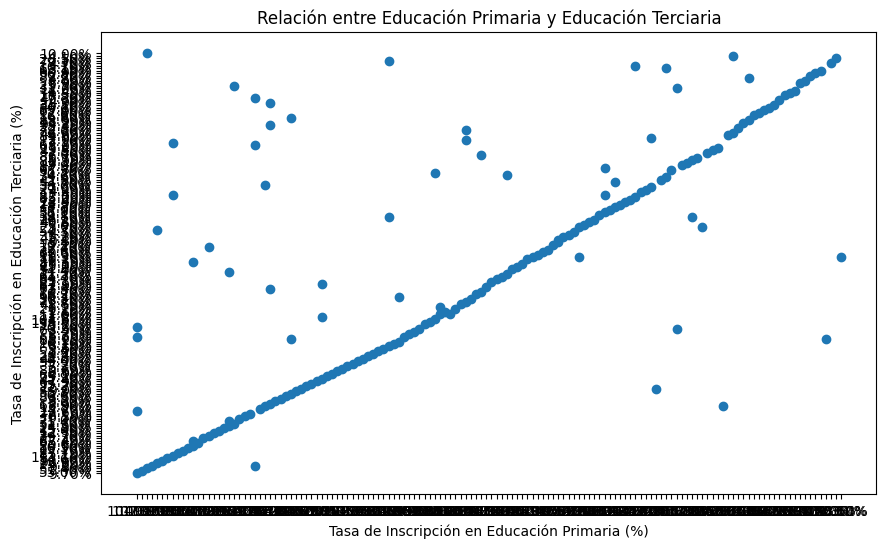

In [50]:
# Seleccionar variables para comparar
variable_primaria = 'Gross primary education enrollment (%)'
variable_terciaria = 'Gross tertiary education enrollment (%)'
# Seleccionar solo las columnas relevantes y eliminar faltantes
education_data = filtered_data[[variable_primaria, variable_terciaria]].dropna()

# Eliminar filas con valores nulos después de la conversión
education_data = education_data.dropna()

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(x=variable_primaria, y=variable_terciaria, data=education_data)
plt.title('Relación entre Educación Primaria y Educación Terciaria')
plt.xlabel('Tasa de Inscripción en Educación Primaria (%)')
plt.ylabel('Tasa de Inscripción en Educación Terciaria (%)')
plt.show()

"""Se nota una distribucion normal aparente, ya que tenemos bastantes datos atipicos y no pude hacer el log porque iban a cambiar los porcentajes puestos,
vemos que la mayoría de los que se iscriben a primaria tienden a seguir  la inscripcion en la educación terciaria"""